# FloPy

## Basic plotting of MODFLOW 6 Results for a single GWF model

This notebook demonstrates use of a MODFLOW 6 binary grid (grd) file to plot structured and unstructured models and use of the `plot_cvfd()` and `contour_array_cvfd()` mapping methods in flopy.

In [1]:
import os
import sys
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# run installed version of flopy or add local path
try:
    import flopy
except:
    fpth = os.path.abspath(os.path.join('..', '..'))
    sys.path.append(fpth)
    import flopy

print(sys.version)
print('numpy version: {}'.format(np.__version__))
print('matplotlib version: {}'.format(mpl.__version__))
print('flopy version: {}'.format(flopy.__version__))

flopy is installed in /Users/jdhughes/Documents/Development/flopy_git/flopy_us/flopy
3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy version: 1.16.2
matplotlib version: 3.0.3
flopy version: 3.2.12


In [2]:
workspace = os.path.join('..', 'data', 'mfgrd_test')

### Single layer structured model

In [3]:
fn = os.path.join(workspace, 'nwtp3.dis.grb')
grd = flopy.utils.MfGrdFile(fn, verbose=True)
iverts, verts = grd.get_verts()
mg = grd.get_modelgrid()
extents = mg.extent
vertc = grd.get_centroids()
print(vertc[0, :])


Processing binary grid file: ../data/mfgrd_test/nwtp3.dis.grb
  File contains data for NCELLS with shape 
  File contains data for NLAY with shape 
  File contains data for NROW with shape 
  File contains data for NCOL with shape 
  File contains data for NJA with shape 
  File contains data for XORIGIN with shape 
  File contains data for YORIGIN with shape 
  File contains data for ANGROT with shape 
  File contains data for DELR with shape (80,)
  File contains data for DELC with shape (80,)
  File contains data for TOP with shape (6400,)
  File contains data for BOTM with shape (6400,)
  File contains data for IA with shape (6401,)
  File contains data for JA with shape (31680,)
  File contains data for IDOMAIN with shape (6400,)
  File contains data for ICELLTYPE with shape (6400,)
Attempting to read 16 records from ../data/mfgrd_test/nwtp3.dis.grb
  Reading NCELLS
  Reading NLAY
  Reading NROW
  Reading NCOL
  Reading NJA
  Reading XORIGIN
  Reading YORIGIN
  Reading ANGROT
  R

In [4]:
print(len(iverts))
print(iverts[0])
print(verts.shape)
print(verts[0:5,:])
print(mg.extent)

6400
[0, 1, 2, 3]
(25600, 2)
[[   0. 8000.]
 [ 100. 8000.]
 [ 100. 7900.]
 [   0. 7900.]
 [ 100. 8000.]]
(0.0, 8000.0, 0.0, 8000.0)


In [5]:
fn = os.path.join(workspace, 'nwtp3.hds.cmp')
ho = flopy.utils.HeadFile(fn)
times = ho.get_times()
print(times)
h = ho.get_data(totim=times[-1]).reshape(80*80)
print(h.shape)

[365.0]
(6400,)


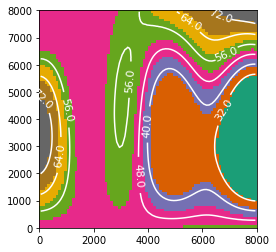

In [6]:
mm = flopy.plot.PlotMapView(modelgrid=mg, layer=0)
ax = plt.gca()
ax.set_xlim(extents[:2])
ax.set_ylim(extents[2:])
mm.plot_cvfd(verts, iverts, a=h)
cs = mm.contour_array_cvfd(vertc, h, colors='white')
plt.clabel(cs, fmt='%.1f', colors='white', fontsize=11);

### Multi-layer structured model

In [7]:
fn = os.path.join(workspace, 'uzfp3_lakmvr_v2.dis.grb')
grd = flopy.utils.MfGrdFile(fn, verbose=True)
iverts, verts = grd.get_verts()
mg = grd.get_modelgrid()
extents = mg.extent
vertc = grd.get_centroids()


Processing binary grid file: ../data/mfgrd_test/uzfp3_lakmvr_v2.dis.grb
  File contains data for NCELLS with shape 
  File contains data for NLAY with shape 
  File contains data for NROW with shape 
  File contains data for NCOL with shape 
  File contains data for NJA with shape 
  File contains data for XORIGIN with shape 
  File contains data for YORIGIN with shape 
  File contains data for ANGROT with shape 
  File contains data for DELR with shape (10,)
  File contains data for DELC with shape (15,)
  File contains data for TOP with shape (150,)
  File contains data for BOTM with shape (300,)
  File contains data for IA with shape (301,)
  File contains data for JA with shape (1142,)
  File contains data for IDOMAIN with shape (300,)
  File contains data for ICELLTYPE with shape (300,)
Attempting to read 16 records from ../data/mfgrd_test/uzfp3_lakmvr_v2.dis.grb
  Reading NCELLS
  Reading NLAY
  Reading NROW
  Reading NCOL
  Reading NJA
  Reading XORIGIN
  Reading YORIGIN
  Read

In [8]:
fn = os.path.join(workspace, 'uzfp3_lakmvr.hds.cmp')
ho = flopy.utils.HeadFile(fn)
times = ho.get_times()
print(times)
h = ho.get_data(totim=times[-1]).reshape(2*15*10)
print(h.shape)
print(vertc.shape)

[2628000.0, 5256000.0, 7884000.0, 10512000.0, 13140000.0, 15768000.0, 18396000.0, 21024000.0, 23652000.0, 26280000.0, 28908000.0, 31536000.0, 34164000.0, 36792000.0, 39420000.0, 42048000.0, 44676000.0, 47304000.0, 49932000.0, 52560000.0, 55188000.0, 57816000.0, 60444000.0, 63072000.0]
(300,)
(300, 2)


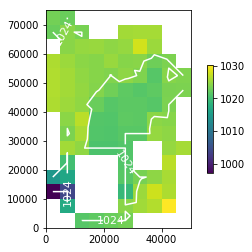

In [9]:
mm = flopy.plot.PlotMapView(modelgrid=mg, layer=0)
ax = plt.gca()
ax.set_xlim(extents[:2])
ax.set_ylim(extents[2:])
v = mm.plot_cvfd(verts, iverts, a=h, ncpl=150, masked_values=[6999.], cmap='viridis')
cs = mm.contour_array_cvfd(vertc, h, ncpl=150, masked_values=[6999.], 
                           levels=[1024], colors='white')
plt.clabel(cs, fmt='%.0f', colors='white', fontsize=11)
plt.colorbar(v, shrink=0.5);

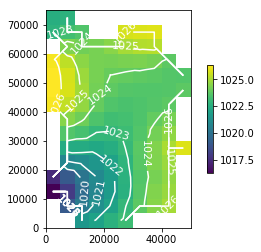

In [10]:
vertc = grd.get_centroids()
mm = flopy.plot.PlotMapView(modelgrid=mg, layer=1)
ax = plt.gca()
ax.set_xlim(extents[:2])
ax.set_ylim(extents[2:])
v = mm.plot_cvfd(verts, iverts, a=h, ncpl=150, masked_values=[6999.], cmap='viridis')
cs = mm.contour_array_cvfd(vertc, h, ncpl=150, masked_values=[6999.], 
                           levels=[1020, 1021, 1022, 1023, 1024, 1025, 1026], colors='white')
plt.clabel(cs, fmt='%.0f', colors='white', fontsize=11)
plt.colorbar(v, shrink=0.5);

### Single-layer unstructured model

In [11]:
fn = os.path.join(workspace, 'flow.disv.grb')
grd = flopy.utils.MfGrdFile(fn, verbose=True)
iverts, verts = grd.get_verts()
vertc = grd.get_centroids()
mg = grd.get_modelgrid()


Processing binary grid file: ../data/mfgrd_test/flow.disv.grb
  File contains data for NCELLS with shape 
  File contains data for NLAY with shape 
  File contains data for NCPL with shape 
  File contains data for NVERT with shape 
  File contains data for NJAVERT with shape 
  File contains data for NJA with shape 
  File contains data for TOP with shape (218,)
  File contains data for BOTM with shape (218,)
  File contains data for VERTICES with shape (156, 2)
  File contains data for CELLX with shape (218,)
  File contains data for CELLY with shape (218,)
  File contains data for IAVERT with shape (219,)
  File contains data for JAVERT with shape (936,)
Attempting to read 13 records from ../data/mfgrd_test/flow.disv.grb
  Reading NCELLS
  Reading NLAY
  Reading NCPL
  Reading NVERT
  Reading NJAVERT
  Reading NJA
  Reading TOP
  Reading BOTM
  Reading VERTICES
  Reading CELLX
  Reading CELLY
  Reading IAVERT
  Reading JAVERT
  JAVERT: min = 1 max = 156
returning vertices for ../da

In [12]:
fn = os.path.join(workspace, 'flow.hds.cmp')
ho = flopy.utils.HeadFile(fn)
times = ho.get_times()
print(times)
h = ho.get_data(totim=times[-1]).reshape(218)
print(h.shape)

[1.0]
(218,)


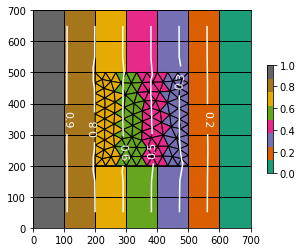

In [13]:
mm = flopy.plot.PlotMapView(modelgrid=mg)
ax = plt.gca()
ax.set_xlim(0,700)
ax.set_ylim(0,700)
v = mm.plot_cvfd(verts, iverts, edgecolor='black', a=h)
cs = mm.contour_array_cvfd(vertc, h, colors='white')
plt.clabel(cs, fmt='%.1f', colors='white', fontsize=11)
plt.colorbar(v, shrink=0.5);

### Single-layer unstructured model with xt3d

In [14]:
fn = os.path.join(workspace, 'flowxt3d.disv.grb')
grd = flopy.utils.MfGrdFile(fn, verbose=True)
iverts, verts = grd.get_verts()
vertc = grd.get_centroids()
mg = grd.get_modelgrid()


Processing binary grid file: ../data/mfgrd_test/flowxt3d.disv.grb
  File contains data for NCELLS with shape 
  File contains data for NLAY with shape 
  File contains data for NCPL with shape 
  File contains data for NVERT with shape 
  File contains data for NJAVERT with shape 
  File contains data for NJA with shape 
  File contains data for TOP with shape (218,)
  File contains data for BOTM with shape (218,)
  File contains data for VERTICES with shape (156, 2)
  File contains data for CELLX with shape (218,)
  File contains data for CELLY with shape (218,)
  File contains data for IAVERT with shape (219,)
  File contains data for JAVERT with shape (936,)
Attempting to read 13 records from ../data/mfgrd_test/flowxt3d.disv.grb
  Reading NCELLS
  Reading NLAY
  Reading NCPL
  Reading NVERT
  Reading NJAVERT
  Reading NJA
  Reading TOP
  Reading BOTM
  Reading VERTICES
  Reading CELLX
  Reading CELLY
  Reading IAVERT
  Reading JAVERT
  JAVERT: min = 1 max = 156
returning vertices f

In [15]:
fn = os.path.join(workspace, 'flowxt3d.hds.cmp')
ho = flopy.utils.HeadFile(fn, precision='double')
times = ho.get_times()
print(times)
h = ho.get_data(totim=times[-1]).reshape(218)
print(h.shape)

[1.0]
(218,)


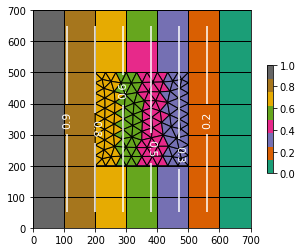

In [16]:
mm = flopy.plot.PlotMapView(modelgrid=mg)
ax = plt.gca()
ax.set_xlim(0,700)
ax.set_ylim(0,700)
v = mm.plot_cvfd(verts, iverts, edgecolor='black', a=h)
cs = mm.contour_array_cvfd(vertc, h, colors='white')
plt.clabel(cs, fmt='%.1f', colors='white', fontsize=11)
plt.colorbar(v, shrink=0.5);

### Single-layer unstructured model with a well

In [17]:
fn = os.path.join(workspace, 'flowwel.disv.grb')
grd = flopy.utils.MfGrdFile(fn, verbose=True)
iverts, verts = grd.get_verts()
vertc = grd.get_centroids()
mg = grd.get_modelgrid()


Processing binary grid file: ../data/mfgrd_test/flowwel.disv.grb
  File contains data for NCELLS with shape 
  File contains data for NLAY with shape 
  File contains data for NCPL with shape 
  File contains data for NVERT with shape 
  File contains data for NJAVERT with shape 
  File contains data for NJA with shape 
  File contains data for TOP with shape (218,)
  File contains data for BOTM with shape (218,)
  File contains data for VERTICES with shape (156, 2)
  File contains data for CELLX with shape (218,)
  File contains data for CELLY with shape (218,)
  File contains data for IAVERT with shape (219,)
  File contains data for JAVERT with shape (936,)
Attempting to read 13 records from ../data/mfgrd_test/flowwel.disv.grb
  Reading NCELLS
  Reading NLAY
  Reading NCPL
  Reading NVERT
  Reading NJAVERT
  Reading NJA
  Reading TOP
  Reading BOTM
  Reading VERTICES
  Reading CELLX
  Reading CELLY
  Reading IAVERT
  Reading JAVERT
  JAVERT: min = 1 max = 156
returning vertices for

In [18]:
fn = os.path.join(workspace, 'flowwel.hds.cmp')
ho = flopy.utils.HeadFile(fn, precision='double')
times = ho.get_times()
print(times)
h = ho.get_data(totim=times[-1]).reshape(218)
print(h.shape)

[1.0]
(218,)


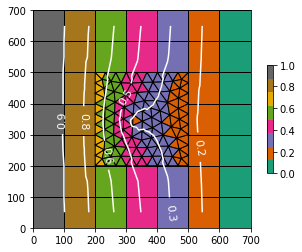

In [19]:
mm = flopy.plot.PlotMapView(modelgrid=mg)
ax = plt.gca()
ax.set_xlim(0,700)
ax.set_ylim(0,700)
v = mm.plot_cvfd(verts, iverts, edgecolor='black', a=h)
cs = mm.contour_array_cvfd(vertc, h, colors='white')
plt.clabel(cs, fmt='%.1f', colors='white', fontsize=11)
plt.colorbar(v, shrink=0.5);

### Single-layer unstructured model with a well and xt3d

In [20]:
fn = os.path.join(workspace, 'flowwelxt3d.disv.grb')
grd = flopy.utils.MfGrdFile(fn, verbose=True)
iverts, verts = grd.get_verts()
vertc = grd.get_centroids()
mg = grd.get_modelgrid()


Processing binary grid file: ../data/mfgrd_test/flowwelxt3d.disv.grb
  File contains data for NCELLS with shape 
  File contains data for NLAY with shape 
  File contains data for NCPL with shape 
  File contains data for NVERT with shape 
  File contains data for NJAVERT with shape 
  File contains data for NJA with shape 
  File contains data for TOP with shape (218,)
  File contains data for BOTM with shape (218,)
  File contains data for VERTICES with shape (156, 2)
  File contains data for CELLX with shape (218,)
  File contains data for CELLY with shape (218,)
  File contains data for IAVERT with shape (219,)
  File contains data for JAVERT with shape (936,)
Attempting to read 13 records from ../data/mfgrd_test/flowwelxt3d.disv.grb
  Reading NCELLS
  Reading NLAY
  Reading NCPL
  Reading NVERT
  Reading NJAVERT
  Reading NJA
  Reading TOP
  Reading BOTM
  Reading VERTICES
  Reading CELLX
  Reading CELLY
  Reading IAVERT
  Reading JAVERT
  JAVERT: min = 1 max = 156
returning vert

In [21]:
fn = os.path.join(workspace, 'flowwelxt3d.hds.cmp')
ho = flopy.utils.HeadFile(fn, precision='double')
times = ho.get_times()
print(times)
h2 = ho.get_data(totim=times[-1]).reshape(218)
print(h2.shape)

[1.0]
(218,)


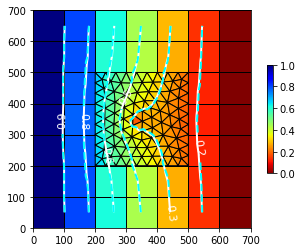

In [22]:
mm = flopy.plot.PlotMapView(modelgrid=mg)
ax = plt.gca()
ax.set_xlim(0,700)
ax.set_ylim(0,700)
v = mm.plot_cvfd(verts, iverts, edgecolor='black', a=h2, cmap='jet_r')
cs = mm.contour_array_cvfd(vertc, h2, colors='white', linewidths=2)
cs = mm.contour_array_cvfd(vertc, h, linestyles='dashed', colors='cyan', linewidths=2)
plt.clabel(cs, fmt='%.1f', colors='white', fontsize=11)
plt.colorbar(v, shrink=0.5);

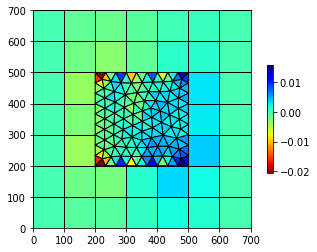

In [23]:
d = h - h2
mm = flopy.plot.PlotMapView(modelgrid=mg)
ax = plt.gca()
ax.set_xlim(0,700)
ax.set_ylim(0,700)
v = mm.plot_cvfd(verts, iverts, edgecolor='black', a=d, cmap='jet_r')
plt.colorbar(v, shrink=0.5);

### Single-layer nested model with a well

In [24]:
fn = os.path.join(workspace, 'flowquadwel.disv.grb')
grd = flopy.utils.MfGrdFile(fn, verbose=True)
iverts, verts = grd.get_verts()
vertc = grd.get_centroids()
mg = grd.get_modelgrid()


Processing binary grid file: ../data/mfgrd_test/flowquadwel.disv.grb
  File contains data for NCELLS with shape 
  File contains data for NLAY with shape 
  File contains data for NCPL with shape 
  File contains data for NVERT with shape 
  File contains data for NJAVERT with shape 
  File contains data for NJA with shape 
  File contains data for TOP with shape (121,)
  File contains data for BOTM with shape (121,)
  File contains data for VERTICES with shape (148, 2)
  File contains data for CELLX with shape (121,)
  File contains data for CELLY with shape (121,)
  File contains data for IAVERT with shape (122,)
  File contains data for JAVERT with shape (629,)
Attempting to read 13 records from ../data/mfgrd_test/flowquadwel.disv.grb
  Reading NCELLS
  Reading NLAY
  Reading NCPL
  Reading NVERT
  Reading NJAVERT
  Reading NJA
  Reading TOP
  Reading BOTM
  Reading VERTICES
  Reading CELLX
  Reading CELLY
  Reading IAVERT
  Reading JAVERT
  JAVERT: min = 1 max = 148
returning vert

In [25]:
fn = os.path.join(workspace, 'flowquadwel.hds.cmp')
ho = flopy.utils.HeadFile(fn, precision='double')
times = ho.get_times()
print(times)
h = ho.get_data(totim=times[-1]).flatten()
print(h.shape)

[1.0]
(121,)


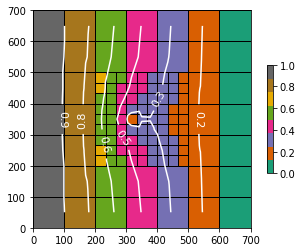

In [26]:
mm = flopy.plot.PlotMapView(modelgrid=mg)
ax = plt.gca()
ax.set_xlim(0,700)
ax.set_ylim(0,700)
v = mm.plot_cvfd(verts, iverts, edgecolor='black', a=h)
cs = mm.contour_array_cvfd(vertc, h, colors='white')
plt.clabel(cs, fmt='%.1f', colors='white', fontsize=11)
plt.colorbar(v, shrink=0.5);

### Single-layer nested model with a well and xt3d

In [27]:
fn = os.path.join(workspace, 'flowquadwelxt3d.disv.grb')
grd = flopy.utils.MfGrdFile(fn, verbose=True)
iverts, verts = grd.get_verts()
vertc = grd.get_centroids()
mg = grd.get_modelgrid()


Processing binary grid file: ../data/mfgrd_test/flowquadwelxt3d.disv.grb
  File contains data for NCELLS with shape 
  File contains data for NLAY with shape 
  File contains data for NCPL with shape 
  File contains data for NVERT with shape 
  File contains data for NJAVERT with shape 
  File contains data for NJA with shape 
  File contains data for TOP with shape (121,)
  File contains data for BOTM with shape (121,)
  File contains data for VERTICES with shape (148, 2)
  File contains data for CELLX with shape (121,)
  File contains data for CELLY with shape (121,)
  File contains data for IAVERT with shape (122,)
  File contains data for JAVERT with shape (629,)
Attempting to read 13 records from ../data/mfgrd_test/flowquadwelxt3d.disv.grb
  Reading NCELLS
  Reading NLAY
  Reading NCPL
  Reading NVERT
  Reading NJAVERT
  Reading NJA
  Reading TOP
  Reading BOTM
  Reading VERTICES
  Reading CELLX
  Reading CELLY
  Reading IAVERT
  Reading JAVERT
  JAVERT: min = 1 max = 148
return

In [28]:
fn = os.path.join(workspace, 'flowquadwelxt3d.hds.cmp')
ho = flopy.utils.HeadFile(fn, precision='double')
times = ho.get_times()
print(times)
h2 = ho.get_data(totim=times[-1]).flatten()
print(h2.shape)

[1.0]
(121,)


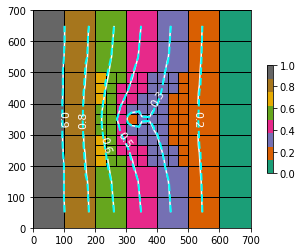

In [29]:
mm = flopy.plot.PlotMapView(modelgrid=mg)
ax = plt.gca()
ax.set_xlim(0,700)
ax.set_ylim(0,700)
v = mm.plot_cvfd(verts, iverts, edgecolor='black', a=h2)
cs = mm.contour_array_cvfd(vertc, h2, colors='white')
plt.clabel(cs, fmt='%.1f', colors='white', fontsize=11)
cs = mm.contour_array_cvfd(vertc, h, linestyles='dashed', colors='cyan', linewidths=2)
plt.colorbar(v, shrink=0.5);

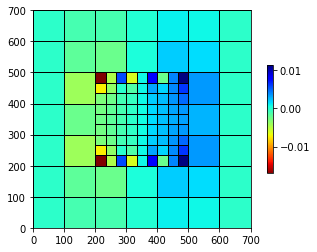

In [30]:
d = h - h2
mm = flopy.plot.PlotMapView(modelgrid=mg)
ax = plt.gca()
ax.set_xlim(0,700)
ax.set_ylim(0,700)
v = mm.plot_cvfd(verts, iverts, edgecolor='black', a=d, cmap='jet_r')
plt.colorbar(v, shrink=0.5);